In [161]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal

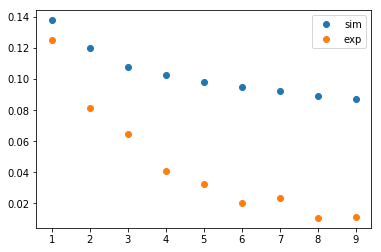

In [6]:
sim = np.array([0.13792135, 0.12028111, 0.10784815 ,0.10242254 ,0.09802149, 0.09494422,
 0.09208105, 0.08920631, 0.08717702])
exp =np.array([0.1249,    0.0815,    0.0648 ,   0.0409 ,   0.0324,    0.0199,    0.0235,    0.0106,0.0112])
N = len(sim)
x = np.arange(1,N+1)
plt.plot(x,sim,ls='',marker = 'o',label ='sim')
plt.plot(x,exp,ls = '',marker = 'o',label = 'exp')
plt.legend()

In [50]:
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_30_23/SigmaField_cooling_PS.csv', delimiter = ',')
#data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/1_30_23/SigmaField_NoRamancooling_PS.csv', delimiter = ',')



In [35]:
def power_law(x, a, b):
    return a * x**b

In [144]:
0.12*0.65

0.078

0.036749675


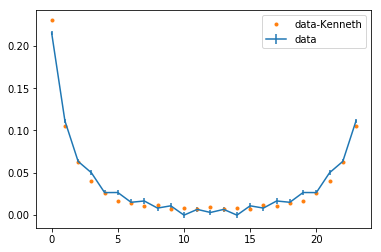

In [212]:
#plt.errorbar(data[:,0],data[:,1],data[:,2])
print(np.average(data[:,1]))
#plt.errorbar(data[:,0],data[:,1]*1.2+0.08,data[:,2],label = 'data*0.65+0.078')
#plt.plot(data[:,0],simdata[:],marker = 'o',ls = '',label = 'sim')
plt.errorbar(data[:,0],(data[:,1]),data[:,2],label = 'data')
plt.plot(x,ave_sigma2_pos,marker = 'o',markersize = 3,ls = '',label = 'data-Kenneth')

#plt.plot(data[:,0],expdata2*0.63+0.075,marker = 'o',ls = '',label = 'Ryan')
#plt.errorbar(data[:,0],data[:,1],data[:,2],ls = '',label = 'Fang',marker = 'o')

#plt.plot(data[1:10,0],power_law(data[1:10,0],0.21,-0.3))
plt.legend()
# plt.xscale('log')
# plt.yscale('log')

In [38]:
simdata=np.array([0.23513887,0.13725895,0.12036162,0.10676615,0.09915829,0.09256072,0.08863921,0.08592485,0.08398068,0.08241807,0.0810125,0.0797318,0.07954196,0.07972313,0.08086032,0.08160596,0.08327514,0.08496372,0.08886353,0.09280065,0.09930302,0.10668414,0.12048065,0.1373209,])

In [39]:
simdata - data[:,1]

array([0.01530887, 0.01759895, 0.04496162, 0.04421715, 0.05828329,
       0.05583872, 0.06424821, 0.05996885, 0.07100468, 0.06726707,
       0.0713603 , 0.0637498 , 0.07390966, 0.06374113, 0.07120812,
       0.06645496, 0.07029914, 0.05900772, 0.06447253, 0.05607865,
       0.05842802, 0.04413514, 0.04508065, 0.0176609 ])

In [115]:
expdata2 = np.array([0.2230,0.1116,0.0711,0.0480,0.0299,0.0234,0.0162,0.0145,0.0127,0.0104,0.0078,0.0076,0.0081,0.0076,0.0078,0.0104,0.0127,0.0145,0.0162,0.0234,0.0299,0.0480,0.0711,0.1116])

In [153]:
np.exp(-7/20)

0.7046880897187134

In [162]:
temp = np.loadtxt('C:/Users/wangy/Downloads/corr_data_20230130_095742.csv',delimiter = ',')

In [193]:
N = 24
sigma2_pos = temp[0:N]
sigma1_pos = temp[N]

In [194]:
np.shape(sigma2_pos)

(24, 24)

In [196]:
ave_sigma2_pos = []
for i in range(N):
    ave_sigma2_pos.append(np.trace(sigma2_pos,i)+np.trace(sigma2_pos,i-N))
ave_sigma2_pos = np.array(ave_sigma2_pos)/N

cor_ave_sigma2_pos = []
cor_sigma2_pos = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        cor_sigma2_pos[i,j] = sigma2_pos[i,j]-sigma1_pos[i]*sigma1_pos[j]
for i in range(N):
    cor_ave_sigma2_pos.append(np.trace(cor_sigma2_pos,i)+np.trace(cor_sigma2_pos,i-N))
cor_ave_sigma2_pos = np.array(cor_ave_sigma2_pos)/N

In [239]:
def fit_func(x,k,b):
    return np.log(k*ave_sigma2_pos+b)

[0.6525804  0.07787249]
[[ 5.94739919e-04 -1.24952974e-05]
 [-1.24952974e-05  7.11449972e-07]]


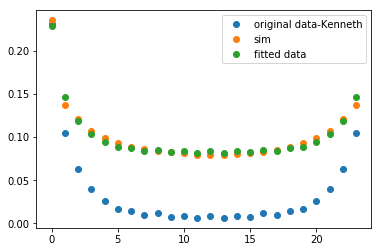

In [240]:
x = np.arange(N)
plt.plot(x,ave_sigma2_pos,marker = 'o',ls = '',label = 'original data-Kenneth')
#plt.plot(x,cor_ave_sigma2_pos,marker = 'o',ls = '',label = 'data-Kenneth-cor')
p,perr = curve_fit(fit_func,np.arange(len(ave_sigma2_pos)),np.log(simdata),p0=[0.7,0.07])
print(p)
print(perr)
plt.plot(data[:,0],simdata,marker = 'o',ls = '',label = 'sim')
plt.plot(data[:,0],ave_sigma2_pos*p[0]+p[1],marker = 'o',ls = '',label = 'fitted data')

# plt.plot(data[:,0],simdata,marker = 'o',ls = '',label = 'sim')
# plt.plot(data[:,0],simdata*p[0]+p[1],marker = 'o',ls = '',label = 'fitted')
plt.legend()
#plt.xscale('log')
#plt.yscale('log')

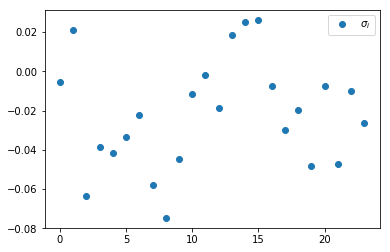

In [187]:
plt.plot(x,sigma1_pos,marker = 'o',ls = '',label = '$\sigma_i$')
plt.legend()

In [198]:
ave_sigma2_pos-cor_ave_sigma2_pos

array([0.00121929, 0.0007626 , 0.00065188, 0.0004877 , 0.00041185,
       0.00047608, 0.00016625, 0.00021522, 0.0002128 , 0.0004618 ,
       0.00055705, 0.00042737, 0.00044325, 0.00042737, 0.00055705,
       0.0004618 , 0.0002128 , 0.00021522, 0.00016625, 0.00047608,
       0.00041185, 0.0004877 , 0.00065188, 0.0007626 ])